In [106]:
import numpy as np
import pandas as pd
import statsmodels.api as statm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Load the dataset

In [107]:
data= statm.datasets.fair.load_pandas().data

In [108]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


Add the column affair : 1 represents having affairs, 0 represents not having affairs

In [109]:
data['affair'] = (data.affairs > 0).astype(int)

In [110]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


To analyze the independent variable and dependent variable we will use pasty.dmatrices,Also add dummy variables for occupation and occupation_hub

In [111]:
y,X=dmatrices('affair~rate_marriage + age + yrs_married + children +  religious + educ + C(occupation)+C(occupation_husb)', data,return_type ="dataframe")
                                  
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


Renaming the features present in X

In [112]:
X = X.rename(columns ={'C(occupation)[1.0]':'occ_1','C(occupation)[2.0]':'occ_2','C(occupation)[3.0]' : 'occ_3' ,'C(occupation[4.0]' : 'occ_4','C(occupation[5.0]':'occ_5','C(occupation)[6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb[T.3.0]' :'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4' , 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],occ_husb_2,C(occupation_husb)[T.3.0],occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


To check where the dataset is balanced or unbalanced

In [113]:
#data=pd.concat([X,y],axis=1)

In [114]:
print(data[data['affair']==0].shape)
print(data[data['affair']==1].shape)

(4313, 10)
(2053, 10)


we can observe that class 0 is almost double of class 1.So we need to balance the dataset aby applying some sampling technique.

In [115]:
from imblearn.over_sampling import RandomOverSampler
radm1=RandomOverSampler(random_state=42)
X,y=radm1.fit_resample(X,y)
data=pd.concat([X,y],axis=1)#updating the balanced form of dataset
print(data[data["affair"]==0].shape)
print(data[data["affair"]==1].shape)

(4313, 18)
(4313, 18)


# Data Visualization

We will check do children affects the husband-wife relationship

C:\Users\Aarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


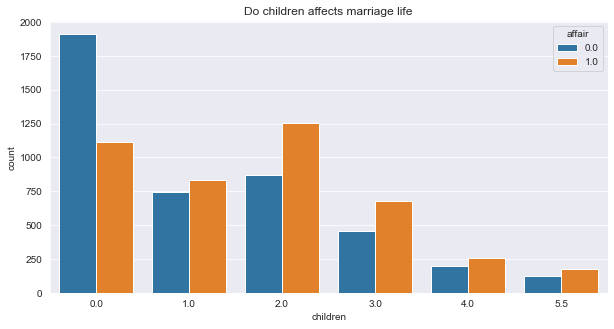

In [116]:
fig = plt.figure(figsize = (10, 5))
sns.set_style("darkgrid")
sns.countplot("children",data=data,hue="affair")
plt.title("Do children affects marriage life")
plt.show()

How women rate their married life on a scale of 1 to 5

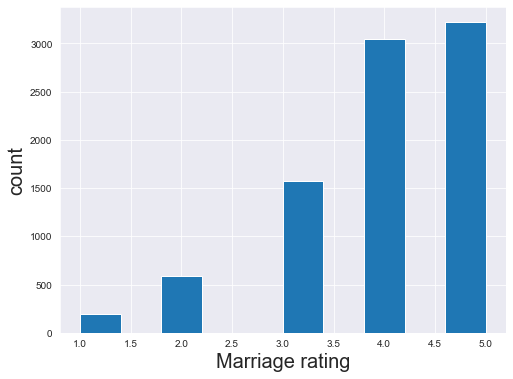

In [117]:
plt.figure(figsize=(8,6))
plt.hist(data["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

We can observe that large number of women are satisfied with their married life irrespective of their affairs.

Now lets split the data into train and test set

In [118]:
y = np.ravel(y)

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6900, 17)
(6900,)
(1726, 17)
(1726,)


Aplying logistic regression

In [123]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
y_train_predicted=model.predict(x_train)

C:\Users\Aarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("training set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("testing set accuracy score :",  accuracy_score(y_test,y_predicted))

training set accuracy score:  0.6804347826086956
testing set accuracy score : 0.6848203939745076


The results show that the model is in normal state

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69       893
         1.0       0.67      0.68      0.68       833

    accuracy                           0.68      1726
   macro avg       0.68      0.68      0.68      1726
weighted avg       0.69      0.68      0.68      1726

